In [946]:
import os
import sys
from pathlib import Path
# Setting the working directory to the root of the project
project_dir = Path("C:/Users/adbou/source/repos/KFHXRelatedAi/")
os.chdir(project_dir)

from Configs.GeneralPaths import SOURCEDATA
import pandas as pd
import numpy as np

In [947]:
#load user transactions data
user_transactions = pd.read_excel(Path(SOURCEDATA / "Transaction_User.xlsx"))
new_user_tranaction = user_transactions.drop(columns=['TrxId'])
new_user_tranaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37951 entries, 0 to 37950
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   FK_BusinessUserId  37951 non-null  int64
 1   PointsRedeemed     37951 non-null  int64
 2   FK_ContentId       37951 non-null  int64
dtypes: int64(3)
memory usage: 889.6 KB


In [948]:
new_user_tranaction.head()

,FK_BusinessUserId,PointsRedeemed,FK_ContentId
0,976480,1000,113923
1,976480,10000,113853
2,976480,10000,113853
3,976921,10,113851
4,976480,50,113835


In [949]:
#load deals data
deals_data = pd.read_excel(Path(SOURCEDATA / "Cleaned_Deals.xlsx"))
deals_data = deals_data.drop(columns=['Unnamed: 0'])
deals_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ContentId    200 non-null    int64 
 1   Title        200 non-null    object
 2   FK_StatusId  200 non-null    int64 
 3   Deal Type    200 non-null    object
 4   Description  200 non-null    object
 5   Location     178 non-null    object
 6   Points       200 non-null    int64 
 7   Categories   200 non-null    object
dtypes: int64(3), object(5)
memory usage: 12.6+ KB


In [950]:
deals_data.head()

,ContentId,Title,FK_StatusId,Deal Type,Description,Location,Points,Categories
0,113815,Off from Al Rifai,2,15 KD Voucher,Get a 15 KD discount voucher for your next onl...,https://www.google.com/maps/search/al+rifai+ku...,15000,F&B
1,113816,Off from Dip n dip,2,10 KD Voucher,Get 10 KD off on your next order from Dip n di...,NaN,10000,F&B
2,113817,Order from Dip n Dip and get discount,1,5KD discount,Order from Dip n Dip and get 5KD discount,https://www.google.com/maps/search/dipndip/@29...,5000,F&B
3,113818,Get discount from Ellena Bakery,2,3KD discount,Get 3KD discount from Ellena Bakery,https://maps.app.goo.gl/bnZXdfUbbaGFjFiJA,3000,F&B
4,113819,Off from Talabat,1,3 KD Voucher,Get 3KD discount from Talabat.,https://goo.gl/maps/5uoJEdD95W1YSpDt9,3000,F&B


In [951]:
#merging deals data with user transaction data :
new_user_tranaction = new_user_tranaction.merge(deals_data[['ContentId', 'Categories']], left_on='FK_ContentId', right_on='ContentId', how='left')
new_user_tranaction = new_user_tranaction.drop(columns=['ContentId'])
new_user_tranaction

,FK_BusinessUserId,PointsRedeemed,FK_ContentId,Categories
0,976480,1000,113923,Health & Beauty
1,976480,10000,113853,Retail
2,976480,10000,113853,Retail
3,976921,10,113851,F&B
4,976480,50,113835,Travel
...,...,...,...,...
37946,1048474,5000,115099,Travel
37947,1056928,6000,115217,Entertainment
37948,1075249,3500,115231,Entertainment
37949,1110587,6000,115217,Entertainment


In [952]:
user_item_matrix = new_user_tranaction.pivot_table(index='FK_BusinessUserId', columns='FK_ContentId', values='PointsRedeemed' ,aggfunc='sum', fill_value=0)
user_item_matrix

FK_ContentId,113816,113817,113819,113823,113824,113829,113830,113833,113834,113835,...,115217,115218,115221,115223,115225,115227,115229,115231,115244,115259
FK_BusinessUserId,,,,,,,,,,,,,,,,,,,,,
976480,0,0,0,0,0,0,0,0,0,50,...,0,0,0,0,0,0,0,0,0,0
976481,0,0,0,0,0,100,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
976482,0,0,0,0,0,100,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
976484,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
976485,0,0,0,0,0,100,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118759,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1119351,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1120134,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Clustering

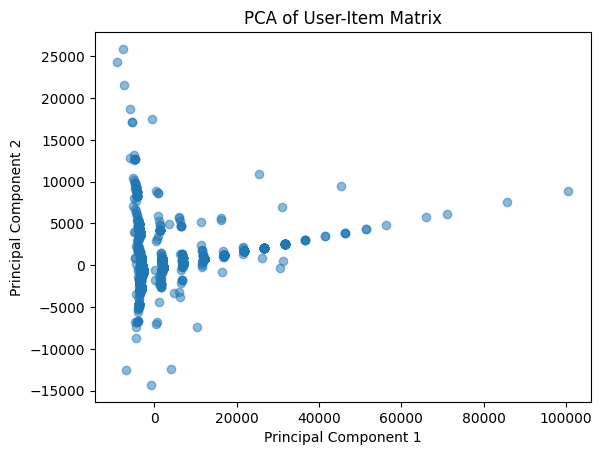

In [953]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming user_item_matrix is already created
user_item_matrix_filled = user_item_matrix.fillna(0)
pca = PCA(n_components=2)
user_item_pca = pca.fit_transform(user_item_matrix_filled)

# Plotting PCA
plt.scatter(user_item_pca[:, 0], user_item_pca[:, 1], alpha=0.5)
plt.title('PCA of User-Item Matrix')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


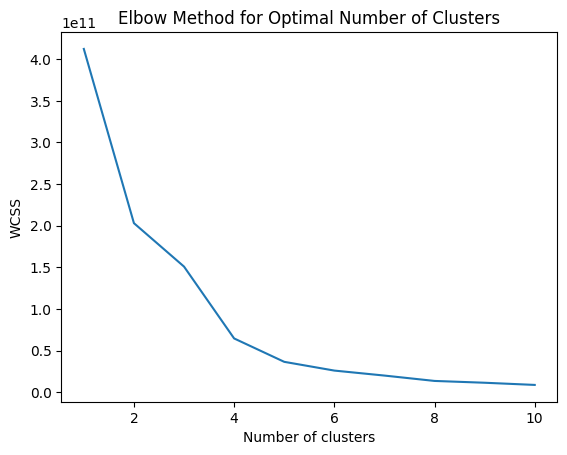

In [954]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(user_item_pca)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


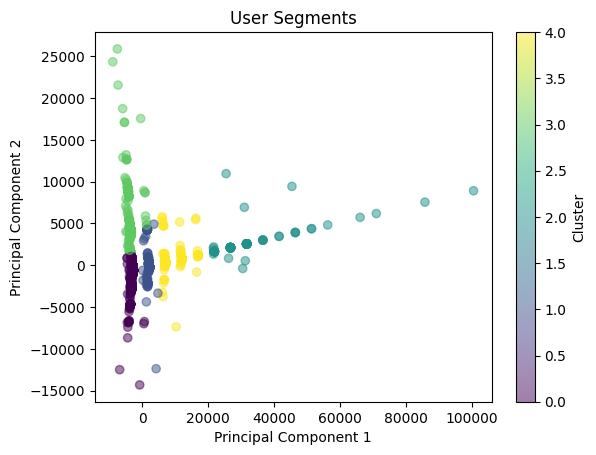

In [955]:
from sklearn.cluster import KMeans

# Applying K-Means Clustering
kmeans = KMeans(n_clusters=5)  # Adjust the number of clusters based on your data
clusters = kmeans.fit_predict(user_item_pca)

# Adding cluster labels to the original data
user_item_matrix['Cluster'] = clusters

# Visualizing clusters
plt.scatter(user_item_pca[:, 0], user_item_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.title('User Segments')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [956]:
cluster_profiles = user_item_matrix.groupby('Cluster').mean()
cluster_profiles


FK_ContentId,113816,113817,113819,113823,113824,113829,113830,113833,113834,113835,...,115217,115218,115221,115223,115225,115227,115229,115231,115244,115259
Cluster,,,,,,,,,,,,,,,,,,,,,
0,1.090631,199.040244,600.719817,1.526884,4.907842,0.501690,1.581416,5.453157,134.692987,0.049078,...,200.894318,222.543353,5.235031,0.872505,9.924746,55.731268,0.381721,9.161304,8.615989,0.490784
1,0.000000,1.202405,63.727455,0.320641,0.240481,0.360721,0.120240,0.801603,7.214429,0.008016,...,5.290581,9.258517,0.000000,0.000000,0.000000,0.000000,0.000000,0.280561,0.641283,0.120240
2,0.000000,0.000000,187.500000,0.000000,0.000000,0.000000,0.000000,0.000000,52.083333,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,5.733945,676.605505,0.764526,1.146789,0.324924,0.764526,0.000000,9.556575,0.000000,...,6.880734,13.379205,0.000000,0.000000,0.000000,4.013761,0.000000,0.000000,4.587156,0.000000
4,0.000000,7.163324,197.707736,0.000000,0.000000,0.716332,0.000000,0.000000,7.163324,0.214900,...,0.000000,20.057307,11.461318,0.000000,0.000000,5.014327,0.000000,0.000000,1.432665,0.000000


KNN

In [957]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix , hstack

user_item_matrix = new_user_tranaction.pivot_table(index='FK_BusinessUserId', columns='FK_ContentId', values='PointsRedeemed', fill_value=0)

# One-hot encode the categories
onehot_encoder = OneHotEncoder()
categories_encoded = onehot_encoder.fit_transform(new_user_tranaction[['Categories']])

categories_df = pd.DataFrame(categories_encoded.toarray(), columns=onehot_encoder.get_feature_names_out(['Categories']))
new_user_tranaction = pd.concat([new_user_tranaction, categories_df], axis=1)


item_feature_matrix = new_user_tranaction.groupby('FK_ContentId').agg({
    'PointsRedeemed': 'mean',
    **{col: 'mean' for col in categories_df.columns}
}).fillna(0)

item_feature_matrix = item_feature_matrix.reindex(user_item_matrix.columns).fillna(0)



user_item_sparse = csr_matrix(user_item_matrix.values)
combined_matrix = hstack([user_item_sparse.T, csr_matrix(item_feature_matrix.values)])

combined_matrix = combined_matrix.tocsr()

model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(combined_matrix)

,PointsRedeemed,Categories_Automotive,Categories_Electronics,Categories_Entertainment,Categories_F&B,Categories_Health & Beauty,Categories_On-demand,Categories_Retail,Categories_Travel
FK_ContentId,,,,,,,,,
113816,10000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
113817,1860000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
113819,8229000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
113823,20000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
113824,51000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
115227,525000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
115229,3500,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
115231,87500,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [958]:
def get_similar_items(item_id, n=10):
    """Function to get top n similar items for a given item_id"""
    item_idx = user_item_matrix.columns.get_loc(item_id)
    distances, indices = model_knn.kneighbors(combined_matrix[item_idx], n_neighbors=n+1)
    similar_items = sorted(zip(indices.squeeze().tolist(), distances.squeeze().tolist()), key=lambda x: x[1])[1:]
    similar_items = [(user_item_matrix.columns[i], dist) for i, dist in similar_items]
    return similar_items

def recommend_items(user_id, n=10):
    """Function to recommend top n items for a given user_id"""
    user_interactions = user_item_matrix.loc[user_id]
    interacted_items = user_interactions[user_interactions > 0].index
    recommendations = pd.Series(dtype=np.float64)

    for item in interacted_items:
        similar_items = get_similar_items(item, n)
        for similar_item, score in similar_items:
            if similar_item in recommendations.index:
                recommendations[similar_item] += score
            else:
                recommendations[similar_item] = score

    
    recommendations = recommendations.drop(interacted_items, errors='ignore')
    recommendations = recommendations.sort_values(ascending=True).head(n)  

    recommended_items_df = deals_data[deals_data['ContentId'].isin(recommendations.index)]

    return recommended_items_df

In [976]:

user_id = 992254   
recommended_items = recommend_items(user_id, n=5)
recommended_items

,ContentId,Title,FK_StatusId,Deal Type,Description,Location,Points,Categories
1,113816,Off from Dip n dip,2,10 KD Voucher,Get 10 KD off on your next order from Dip n di...,NaN,10000,F&B
38,113853,Get discount from H&S Store,1,10KD discount,Get 10KD discount from HS,https://www.google.com/maps/search/H%26S/@29.3...,10000,Retail
108,113923,25% off from Alkhalid clinic,2,25% Discount,Discover a younger you with a 25% Discount cod...,https://www.google.com/maps/place/Al+Khaled+Cl...,1000,Health & Beauty
149,115104,Get discount from Bon Café,1,5KD discount,Get 5KD discount from Bon Café,https://www.google.com/maps/search/bon+cafe+ku...,5000,F&B
193,115223,Xbox Live 3 months free subscription,1,Xbox 3 months subscription,Get a 3-month free subscription for Xbox Live ...,NaN,8000,Entertainment


In [971]:
user_last_interactions = user_item_matrix.loc[user_id]
user_interacted_items = user_last_interactions[user_last_interactions > 0].index
user_deals = deals_data[deals_data['ContentId'].isin(user_interacted_items)]
user_deals

,ContentId,Title,FK_StatusId,Deal Type,Description,Location,Points,Categories
144,115099,Get wallet recharge at Oula Fuel App.,1,5KD wallet recharge,Get 5KD wallet recharge at Oula Fuel App.,https://www.google.com/maps/search/%D9%85%D8%A...,5000,Travel


In [972]:
user_trs = new_user_tranaction[new_user_tranaction["FK_BusinessUserId"] == user_id]
user_trs

,FK_BusinessUserId,PointsRedeemed,FK_ContentId,Categories,Categories_Automotive,Categories_Electronics,Categories_Entertainment,Categories_F&B,Categories_Health & Beauty,Categories_On-demand,Categories_Retail,Categories_Travel
7777,983453,5000,115099,Travel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7778,983453,5000,115099,Travel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7780,983453,5000,115099,Travel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
